# PREDICTION ON SET OF DIABETIC PATIENTS

## Introduction

## The CRISP-DM Framework for Data Science Projects
-----------------------------------------------------
The CRISP-DM process was developed by the means of the effort of a consortium initially composed
with DaimlerChryrler, SPSS and NCR. CRISP-DM stands for CRoss-Industry Standard Process for Data
Mining. It consists on a cycle that comprises six stage as below.
<ol>
<li> Business understanding – This initial phase focuses on understanding the project objectives and
requirements from a business perspective, then converting this knowledge into a data mining
problem definition and a preliminary plan designed to achieve the objectives.
<li> Data understanding – The data understanding phase starts with an initial data collection and
proceeds with activities in order to get familiar with the data, to identify data quality problems,
to discover first insights into the data or to detect interesting subsets to form hypotheses for
hidden information.
<li> Data preparation – The data preparation phase covers all activities to construct the final dataset
from the initial raw data.
<li> Modeling – In this phase, various modeling techniques are selected and applied and their
parameters are calibrated to optimal values.
<li> Evaluation – At this stage the model (or models) obtained are more thoroughly evaluated and the
steps executed to construct the model are reviewed to be certain it properly achieves the business
objectives.
<li> Deployment – Creation of the model is generally not the end of the project. Even if the purpose
of the model is to increase knowledge of the data, the knowledge gained will need to be
organized and presented in a way that the customer can use it. 
</ol>

## A Library of Functions

In [11]:
##python library used
import pandas as pd
from matplotlib import pyplot as plt

def set_spines(ax):
    for side in ['left','right','top']:
        ax.spines[side].set_edgecolor('white')

#function to draw barchart       
def draw_barchart(ax, xValues, yValues, xlabel,ylabel,title):
    # Creating the bars from frequency_table dataframe
    ax.bar(xValues,yValues, color='red',alpha=0.5)
    #Put a label on x axis
    ax.set_xlabel(xlabel)
    #Put a label on y axis
    ax.set_ylabel(ylabel)
    #Set a title of the chart
    ax.set_title(title)
    #Rotate x-axis ticklabels to 45 degree
    ax.tick_params(axis='x', rotation=0) 

    set_spines(ax=ax)

#creating histogram
def create_barchart(df,x,ax,xlabel,ylabel,title,theta=0):    
    x_col = df[x]
    frequency_table = x_col.value_counts() 
    #Converting the frequency table to a dataframe object
    frequency_table = frequency_table.reset_index()
    #Setting the column names to meaningful values
    frequency_table.columns = [x, 'Patients']
      
    draw_barchart(ax,frequency_table[x],  frequency_table['Patients'],xlabel,ylabel,title)
    
    return ax

#function to discrete values like age ,Body mass index(bmi)
def analyze_discrete_variable(df,variable,xlabel):
    #Number of distinct values for variable
    fig, (ax,bx,cx) = plt.subplots(1,3,figsize=(15,1.5))  # Adjust the figure size if needed
    gender_col = df[variable]
    create_barchart(df=df,x=variable,ax=ax,xlabel=xlabel,ylabel='Patients',title='All Patients')

    diabetes_filter = df['diabetes']==1
    diabetes_df = df[diabetes_filter]
    create_barchart(df=diabetes_df,x=variable,ax=bx,xlabel=xlabel,ylabel='Patients',title='Diabetic Patients')

    #Diabetes rate by gender
    percentage_diabetics = df.groupby(variable)['diabetes'].mean() * 100
    #Converting the result into a dataframe object
    percentage_diabetics = percentage_diabetics.reset_index()
    percentage_diabetics.columns = [variable,'Diabetics']
    draw_barchart(cx, percentage_diabetics[variable], percentage_diabetics['Diabetics'],
               xlabel=xlabel,ylabel='Patients',title='Diabetes Rate')

    set_spines(ax=cx)
    
    return fig, ax, bx, cx
    
#function to continous values on dataset like gender ,hypertension 
def analyze_continous_variable(df,variable, xlabel, bins):
    #Create a histogram for total population
    x_column = df[variable]
    fig, (ax,bx,cx) = plt.subplots(1,3,figsize=(15, 1.5))  # Adjust the figure size if needed
    freq2,bins,_ = ax.hist(x_column,bins=bins,histtype='step',linewidth=2,color='green')

    #Create a histogram just for the diabetics
    diabetes_filter = df['diabetes']==1
    diabetes_df = df[diabetes_filter]
    x_column = diabetes_df[variable]
    freq1,bins,_ = bx.hist(x_column,bins=bins,histtype='step',linewidth=2,color='yellow')

    #We calculate diabtetics rate in each bucket by dividing freq1 by freq2
    rate = []
    for f1,f2 in zip(freq1,freq2):
        r = (f1/(f2+0.00001))*100.
        rate.append(r)

    #Now we will use bars to plot this frequency
    cx.plot(bins[:-1],rate,marker='o',color='red')

    #
    ax.set_xlabel(xlabel)
    bx.set_xlabel(xlabel)
    cx.set_xlabel(xlabel)


    #Put a label on y axis
    ax.set_ylabel('Patients')
    #Set a title of the chart
    ax.set_title('All Patients')
    #Rotate x-axis ticklabels to 45 degree
    ax.tick_params(axis='x', rotation=45) 

    bx.set_title('Diabetic Patients')
    cx.set_title('Diabetic Rate')

    set_spines(ax)
    set_spines(bx)
    set_spines(cx)

    
    return fig,ax,bx,cx


## Data Understanding
<ol>
<li> Dataset (source, origins and description)
<li> Explanation of variables and their statistics & visualizations.
<li> Correlation analysis
</ol>

In [3]:
#Read file into a pandas dataframe
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv('diabetes_prediction_dataset.csv')
# Assuming df is your DataFrame
print(len(df))
df.head(10)

100000


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


### Handle duplicates

In [4]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)
# drop the duplicate values/fileds
df = df.drop_duplicates()

number of duplicate rows:  (3854, 9)


In [5]:
print(df.groupby('diabetes').size())

diabetes
0    87664
1     8482
dtype: int64


## Analysis of continous variables

### Age

Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is partly due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.

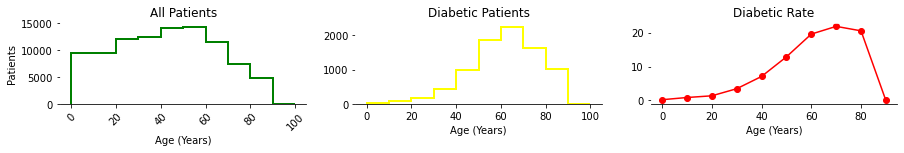

In [6]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
f,a,b,c = analyze_continous_variable(df,variable='age', xlabel='Age (Years)', bins=bins)

In the figure above, we see that patients in higher age buckets have greater chances of being diabetic. We see that the rate is very small below 40 years of age but the rises sharply to become 20-25% by the age of 60.

### BMI


BMI, or Body Mass Index, is a numerical measure of a person's body weight in relation to their height. It is widely used as a simple and quick screening tool to identify possible weight-related health problems.
The formula to calculate BMI is as follows:
<ol>BMI=weight(kg)/(height(meter))^2</ol>

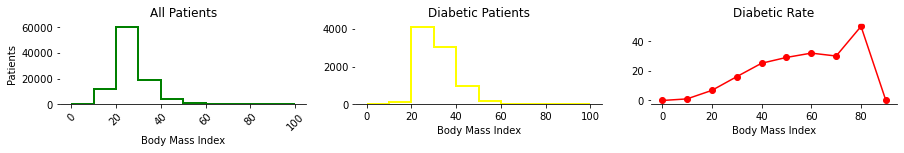

In [7]:
bins=[0,10,20,30,40,50,60,70,80,90,100]
f,a,b,c = analyze_continous_variable(df,variable='bmi', xlabel='Body Mass Index', bins=bins)

In the figure above, we see that higher values of BMI can be correlated with higher occurence of the disease. We see that the rate starts increasing after BMI = 20, and saturates around by BMI=60.

### HbA1c_level

HbA1c, or Hemoglobin A1c, is a blood test that measures the average blood sugar level over the past 2-3 months. It is a commonly used indicator for managing and diagnosing diabetes. The term "HbA1c level" refers to the percentage of hemoglobin that is glycated or has glucose attached to it.
<ol><li> Normal:Below 5.7% Prediabetes
    <li>Prediabetes:5.7% to 6.4%
    <li>Diabetes:6.7% or higher </ol>

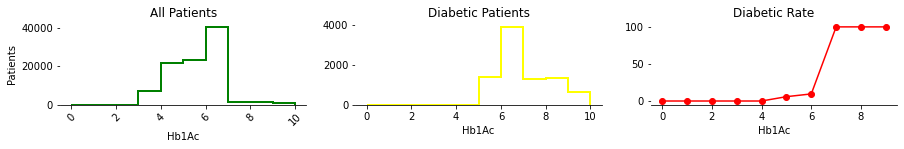

In [8]:
bins=[0,1,2,3,4,5,6,7,8,9,10]
#f,a,b,c = analyze_continous_variable(variable='hba1C', xlabel='Hb1Ac',bins=bins)
f,a,b,c = analyze_continous_variable(df,variable='HbA1c_level', xlabel='Hb1Ac', bins=bins)

We observed that the higher values of Hb1Ac can be associated with higher rate of diabetes, especially in the range beyond 6 almost all the patients are diabetic

### Blood Glucose Level

Blood glucose level refers to the amount of glucose (sugar) present in the blood at a given time. Elevated blood glucose levels, particularly in the fasting state or after consuming carbohydrates, can indicate impaired glucose regulation and increase the risk of developing diabetes. Regular monitoring of blood glucose levels is important in the diagnosis and management of diabetes.



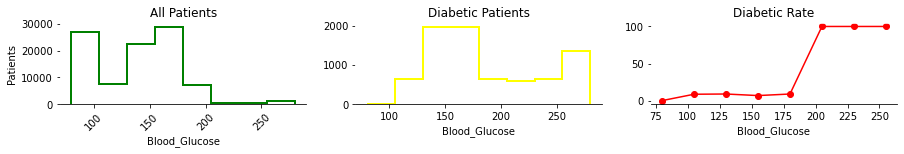

In [9]:
#codepde to create a bins range
bin_width = 25
num_bins = int((300-80)/bin_width) + 1

bins = []
for i in range(0, num_bins):
    bins.append(80+i*bin_width)
    
f,a,b,c = analyze_continous_variable(df, variable='blood_glucose_level' ,xlabel = "Blood_Glucose",bins=bins)

We see that for diabetics the blood glucose levels tend to be higher. We see that all the patients with levels > 175 are diabetics

## Analysis of discrete variables


### Gender

Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.

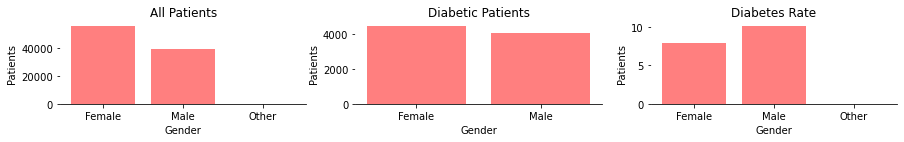

In [12]:
f,a,b,c =analyze_discrete_variable(df=df,variable='gender',xlabel='Gender')

We observed that our dataset has fewer men, and the diabetes rate is higher among them.

### Hypertension

Hypertension, or high blood pressure, is a condition that often coexists with diabetes. The two conditions share common risk factors and can contribute to each other's development. Having hypertension increases the risk of developing type 2 diabetes and vice versa. Both conditions can have detrimental effects on cardiovascular health

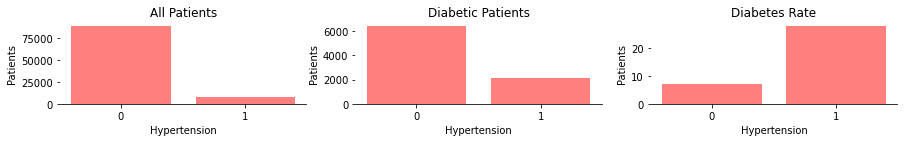

In [13]:
f,a,b,c = analyze_discrete_variable(df,variable='hypertension',xlabel='Hypertension')
for ax in (a,b,c):ax.set_xticks([0,1])

We see that hypertension has a low occurence rate in our data, but when we look just at the diabetics we see that percentage grow. Accordingly the hypertension is correlated with higher rates of diabetes.

### Heart_disease

Heart disease, including conditions such as coronary artery disease and heart failure, is associated with an increased risk of diabetes. The relationship between heart disease and diabetes is bidirectional, meaning that having one condition increases the risk of developing the other. This is because they share many common risk factors, such as obesity, high blood pressure, and high cholesterol.

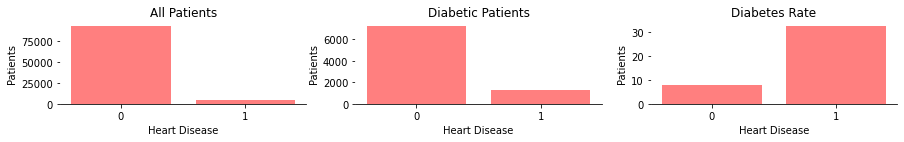

In [14]:
f,a,b,c = analyze_discrete_variable(df,variable='heart_disease',xlabel='Heart Disease')
for ax in (a,b,c): ax.set_xticks([0,1])

The presence of Heart Disease is clearly correlated with very high rate of diabetes at nearly 30% (compared to 5-10% in non heart patients)

### Smoking_history

Smoking is a modifiable risk factor for diabetes. Cigarette smoking has been found to increase the risk of developing type 2 diabetes. Smoking can contribute to insulin resistance and impair glucose metabolism. Quitting smoking can significantly reduce the risk of developing diabetes and its complications.

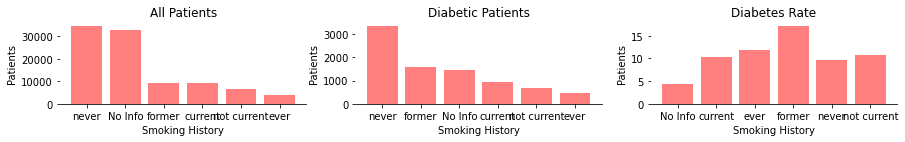

In [15]:
f,a,b,c =analyze_discrete_variable(df,variable='smoking_history',xlabel='Smoking History')

## Data Preparation
* Missing value treatment
* Outlier removal
* Encoding the categorical variables
* Normalization of the continuous variables
* Split dataset into training and testing sets

In [16]:
df = df.dropna()

#### One Hot Encoding

The column is broken into a set of binary dummy columns, that equal in number, to the cardinality of the original column. Each original discrete is then represented by a unique combination.


In [17]:
# Perform one-hot encoding
categorical_variables = ['gender','hypertension','heart_disease','smoking_history']
df_encoded = pd.get_dummies(df, columns=categorical_variables)

# Display the one-hot encoded DataFrame
print("\nOne-hot encoded DataFrame:\n", df_encoded)



One-hot encoded DataFrame:
         age    bmi  HbA1c_level  blood_glucose_level  diabetes  gender_Female  \
0      80.0  25.19          6.6                  140         0           True   
1      54.0  27.32          6.6                   80         0           True   
2      28.0  27.32          5.7                  158         0          False   
3      36.0  23.45          5.0                  155         0           True   
4      76.0  20.14          4.8                  155         0          False   
...     ...    ...          ...                  ...       ...            ...   
99994  36.0  24.60          4.8                  145         0           True   
99996   2.0  17.37          6.5                  100         0           True   
99997  66.0  27.83          5.7                  155         0          False   
99998  24.0  35.42          4.0                  100         0           True   
99999  57.0  22.43          6.6                   90         0           True   

## Scaling the Continuous Variables:

#### Min-Max Scaling
If we wish to scale a column into the range (R1, R2), then we replace each alue X of the column by following
<code>
X_new = (X - X_min)/ (X_max-X_min)  *  ×(R2−R1)+R1
</code>

In [18]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['age', 'bmi', 'HbA1c_level','blood_glucose_level']

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_encoded [columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

### Splitting the data into training & testing datasets

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

#The independent variables:
X = df_encoded.drop(columns=['diabetes'])
y = df_encoded['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Model Training & Validation

[0 0 1 ... 0 0 0]
Accuracy: 0.9574102964118565
Precision: 0.96
Recall: 0.99
F1 Score: 0.98


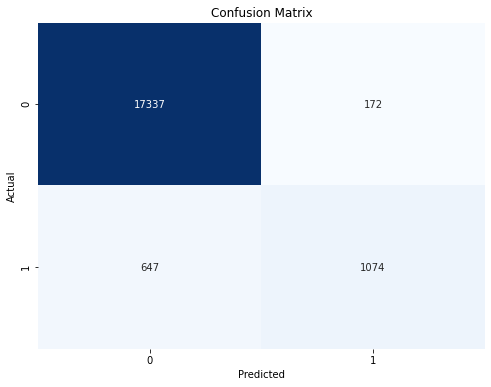

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create a Logistic regression model 
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

print(y_pred)

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Extract precision, recall, and F1 score from the classification report
accuracy = accuracy_score(y_test, y_pred)
precision = class_report.split('\n')[2].split()[1]
recall = class_report.split('\n')[2].split()[2]
f1_score = class_report.split('\n')[2].split()[3]


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


#results dictionary

results = {
    
    'model' : ['LogisticRegression'],
    'accuracy' : [accuracy],
    'precision':[precision],
    'recall':[recall],
    'F1Score':[f1_score],
    
}




# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9570982839313572
Precision: 0.97
Recall: 0.99
F1 Score: 0.98


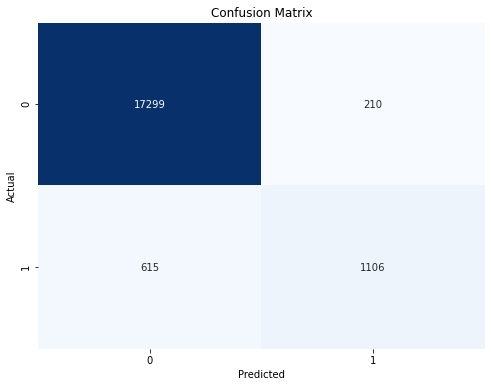

In [21]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
# Initialize the MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', max_iter=1000, random_state=42)
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Extract precision, recall, and F1 score from the classification report
accuracy = accuracy_score(y_test, y_pred)
precision = class_report.split('\n')[2].split()[1]
recall = class_report.split('\n')[2].split()[2]
f1_score = class_report.split('\n')[2].split()[3]

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


results['model'].append('MLPClassifier')
results['accuracy'].append(accuracy)
results['precision'].append(precision)
results['recall'].append(recall)
results['F1Score'].append(f1_score)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparing the Model Performances

In [22]:
results = pd.DataFrame(results)
results.head(10)

,model,accuracy,precision,recall,F1Score
0,LogisticRegression,0.957410,0.96,0.99,0.98
1,MLPClassifier,0.957098,0.97,0.99,0.98


## Conclusions
Logistic Regression and MLPClassifier.

Accuracy:

Logistic Regression: 95.74%
MLPClassifier: 95.71%
Both models have high accuracy, indicating that they are performing well overall in terms of correctly predicting the target variable.
Precision:

Logistic Regression: 96%
MLPClassifier: 97%
Precision is the ratio of correctly predicted positive observations to the total predicted positives. Both models have high precision, suggesting that when they predict the positive class, they are often correct.
Recall:

Logistic Regression: 99%
MLPClassifier: 99%
Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in the actual class. Both models have high recall, indicating that they are effective at capturing the actual positive instances.
F1 Score:

Logistic Regression: 98%
MLPClassifier: 98%
F1 Score is the weighted average of Precision and Recall. It considers both false positives and false negatives. Both models have a high F1 Score, indicating a good balance between precision and recall.
Conclusion:

Both models perform very well, with high accuracy, precision, recall, and F1 Score.
The choice between the models may depend on other factors such as interpretability, training time, and model complexity.
Since the metrics are quite close, you may consider other aspects like model interpretability, ease of use, and computational resources when choosing between the two models.
Overall, based on the provided metrics, both models seem to be doing a good job in classifying the target variable, with the MLPClassifier showing slightly higher precision.

# Save Model and load Model

In [24]:
# Import pickle
import pickle

# Save the trained model
pickle.dump(model, open('diabetes_model.pkl', 'wb'))

print("Model saved successfully as diabetes_model.pkl")


Model saved successfully as diabetes_model.pkl


In [25]:
loaded_model = pickle.load(open('diabetes_model.pkl', 'rb'))

print("Model loaded successfully")


Model loaded successfully
